<a href="https://www.kaggle.com/code/stefancomanita/image-generation-with-min-dalle-and-pytorch?scriptVersionId=166168021" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Intro
Hello, in this notebook we will use the the min-dalle libary to generate some images by prompting! There are a few such libaries but I find min-dalle the best compromise between ease of use and performance.

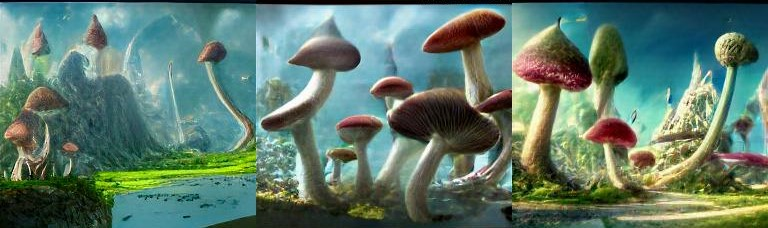

You can find out more about min-dalle [here](https://github.com/kuprel/min-dalle)

# Install and imports
In this section we will install and import the libraries we need.

In [2]:
# first we install min-dalle using pip
!pip install min-dalle

  Preparing metadata (setup.py) ... - done
  Created wheel for min-dalle: filename=min_dalle-0.4.11-py3-none-any.whl size=10518 sha256=b5b83a3cdfd62a0e46e70a0d403ee2e186105ee936cf23df7d63c5feba9044ea
  Stored in directory: /root/.cache/pip/wheels/52/6d/e3/c4eae4ec07f23168d03ed0f58073be84cd4d0a4c990eec7dc2
Successfully built min-dalle


In [3]:
# the imports we need
import torch
from min_dalle import MinDalle

# Declaring the model
In this section we will the declare the model that we will use.

In [4]:
# create the model
model = MinDalle(
    dtype=torch.float32,
    is_mega=True, # the mega param greatly affects quality but also performance. set it to false for fast results
    is_reusable=True,
    device = 'cuda'
)

# print the created model
print(model)

using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


# Gnerating images
Now to the best part. We first declare some hyper parameters and then we declare a method for generating images.

After this we attempt some prompts.

In [5]:
# hyper parameters
gridSize = 3
temperature = 4
superconditionFactor = 16
topK = 128

In [6]:
# method for generating images, for display we will use the provided display method
def generateImageByPrompt(promt: str, gridSize=gridSize):
    image = model.generate_image(
    text=promt,
    seed=-1,
    temperature=temperature,
    top_k=int(topK),
    supercondition_factor=superconditionFactor,
    grid_size=gridSize            
    )
    
    return image

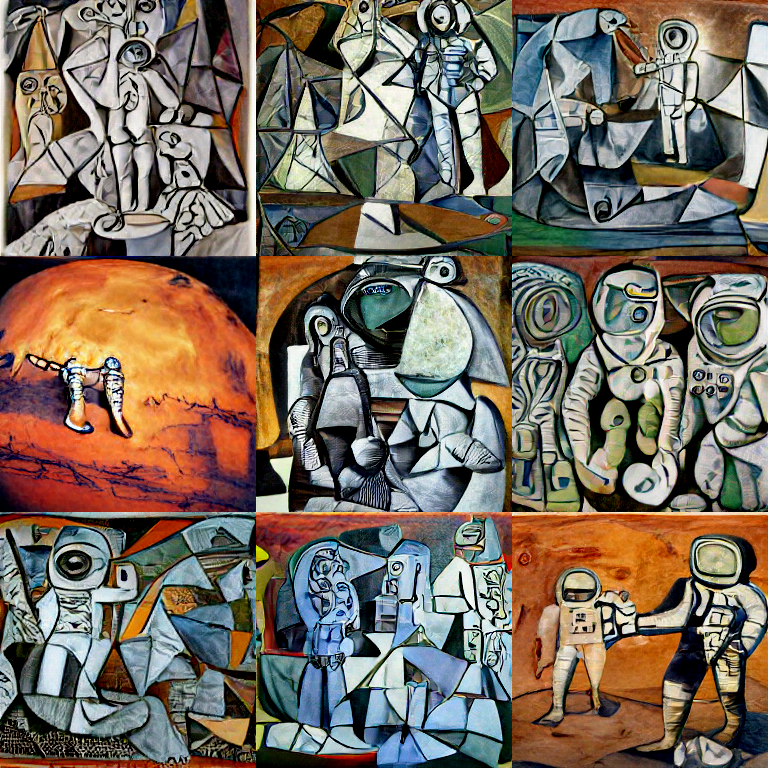

In [7]:
display(generateImageByPrompt("astronauts on mars painted by picasso"))

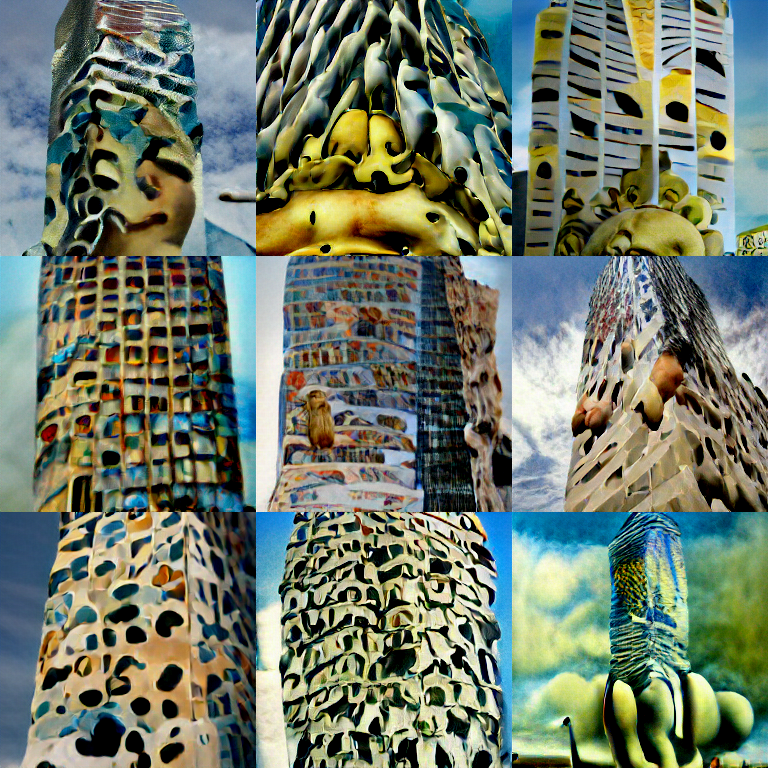

In [8]:
display(generateImageByPrompt("skyscraper painted by dali"))

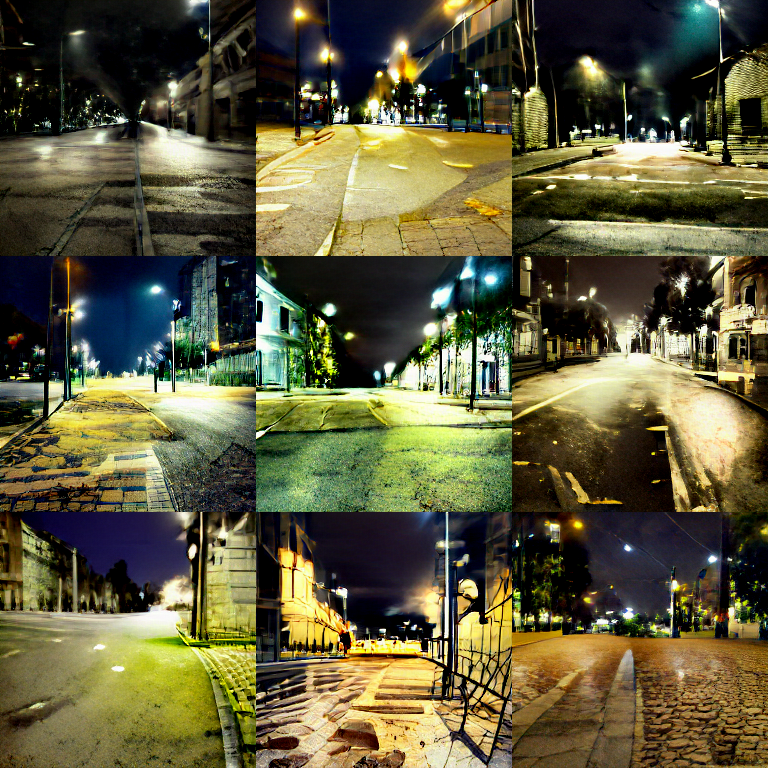

In [9]:
display(generateImageByPrompt("empty city streets at night"))

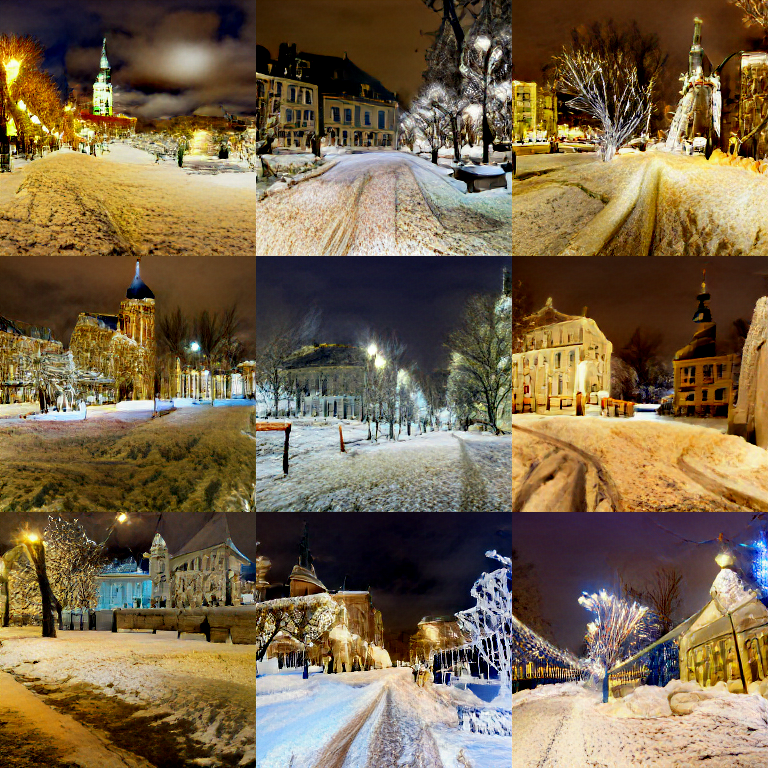

In [10]:
display(generateImageByPrompt("easter european city in winter by night"))

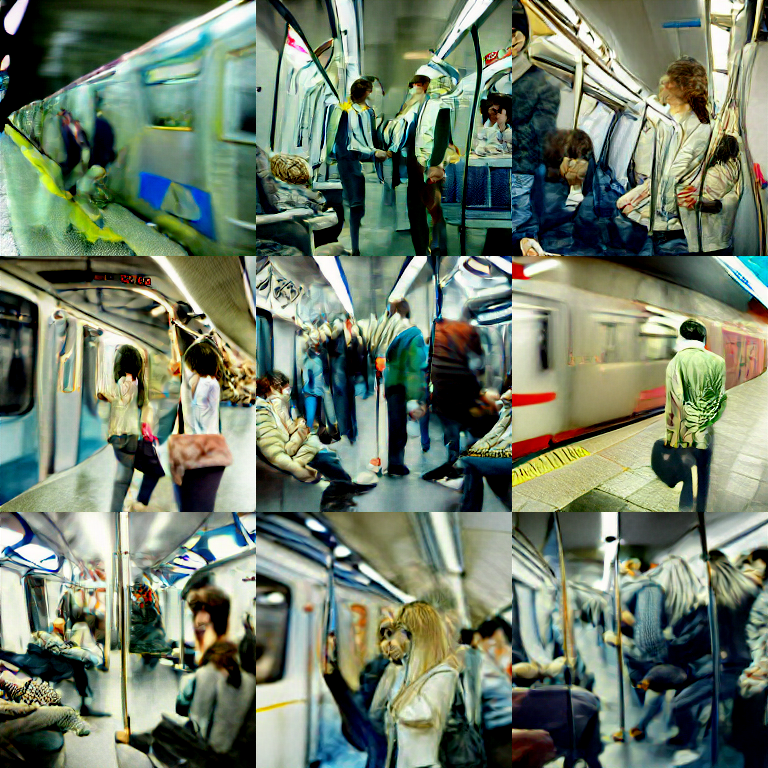

In [11]:
display(generateImageByPrompt("people commuting to work in the subway"))

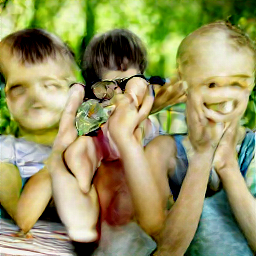

In [12]:
# here let's generate just a single image, we manage this by setting the grid size to 1
display(generateImageByPrompt("children in the park in a summer day", gridSize=1))

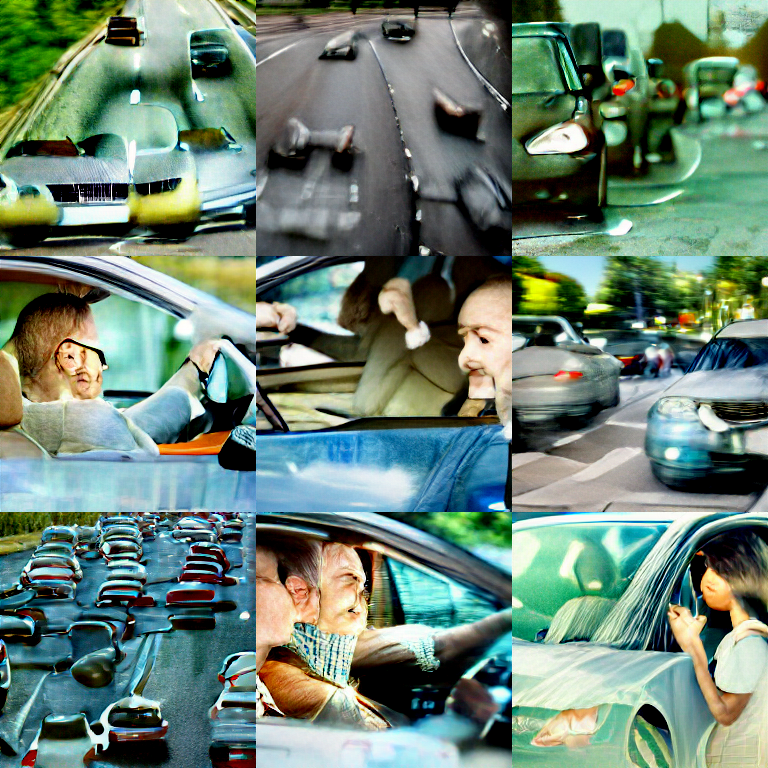

In [13]:
display(generateImageByPrompt("cars commuting"))

# Finish
You have made it to the finish, thank you! Please upvote if you liked this :)